In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv("Crop_recommendation.csv")

In [17]:
# Data Preprocessing
data = data.dropna()
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [18]:
data["label"].unique()
data["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [ ]:
## label encoding
label_dict = {i:key for key,i in enumerate(list(data["label"].unique()))}
data["label"] = data["label"].map(label_dict)
data["label"].unique()
data = data.reset_index(drop=True)
label_dict

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [ ]:
## by label encoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data["label"] = le.fit_transform(data["label"])
# data["label"].unique()
# data = data.reset_index(drop=True)
# data.head()

In [20]:
data["label"].value_counts()

label
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

In [29]:
# Data spliting
X = data.drop(columns=["label"])
Y = data["label"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
## standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
## multi model training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [40]:
model_dict = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [41]:
for model_name, model in model_dict.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

LogisticRegression Accuracy: 0.9636
GaussianNB Accuracy: 0.9955
SVC Accuracy: 0.9682
KNeighborsClassifier Accuracy: 0.9659
DecisionTreeClassifier Accuracy: 0.9886
ExtraTreeClassifier Accuracy: 0.9068
RandomForestClassifier Accuracy: 0.9932
GradientBoostingClassifier Accuracy: 0.9818
AdaBoostClassifier Accuracy: 0.1455


In [43]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


Text(0.5, 1.0, 'Correlation Heatmap')

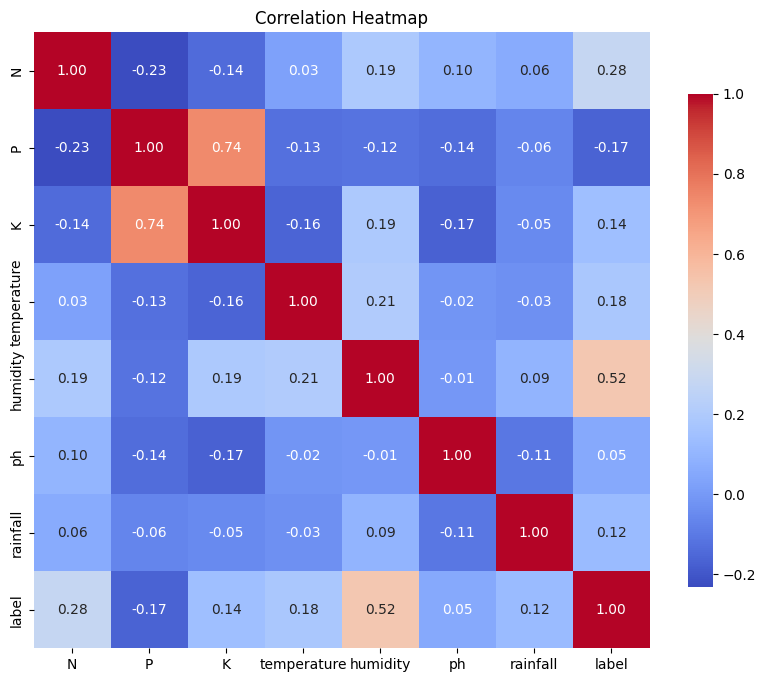

In [46]:
## heatmap
data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")